In [1]:
import seaborn as sns
from copy import copy

import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split, cross_validate, cross_val_score, RepeatedStratifiedKFold
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import classification_report, recall_score, precision_score, accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from collections import Counter
!pip install imblearn
import imblearn
from imblearn.over_sampling import SMOTE
from numpy import mean
from sklearn.datasets import make_classification
from sklearn.tree import DecisionTreeClassifier
from imblearn.pipeline import Pipeline
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import make_pipeline as make_imb_pipeline
from sklearn.impute import SimpleImputer

# Online News Popularity
Data upload + first look

In [6]:
import pandas as pd

onpdata = pd.read_csv('https://raw.githubusercontent.com/Constantin2610/ONP/main/OnlineNewsPopularity/OnlineNewsPopularity.csv')

In [7]:
onpdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39644 entries, 0 to 39643
Data columns (total 61 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   url                             39644 non-null  object 
 1    timedelta                      39644 non-null  float64
 2    n_tokens_title                 39644 non-null  float64
 3    n_tokens_content               39644 non-null  float64
 4    n_unique_tokens                39644 non-null  float64
 5    n_non_stop_words               39644 non-null  float64
 6    n_non_stop_unique_tokens       39644 non-null  float64
 7    num_hrefs                      39644 non-null  float64
 8    num_self_hrefs                 39644 non-null  float64
 9    num_imgs                       39644 non-null  float64
 10   num_videos                     39644 non-null  float64
 11   average_token_length           39644 non-null  float64
 12   num_keywords                   

In [8]:
onpdata.describe()

,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
count,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,...,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000
mean,354.530471,10.398749,546.514731,0.548216,0.996469,0.689175,10.883690,3.293638,4.544143,1.249874,...,0.095446,0.756728,-0.259524,-0.521944,-0.107500,0.282353,0.071425,0.341843,0.156064,3395.380184
std,214.163767,2.114037,471.107508,3.520708,5.231231,3.264816,11.332017,3.855141,8.309434,4.107855,...,0.071315,0.247786,0.127726,0.290290,0.095373,0.324247,0.265450,0.188791,0.226294,11626.950749
min,8.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,-1.000000,-1.000000,-1.000000,0.000000,-1.000000,0.000000,0.000000,1.000000
25%,164.000000,9.000000,246.000000,0.470870,1.000000,0.625739,4.000000,1.000000,1.000000,0.000000,...,0.050000,0.600000,-0.328383,-0.700000,-0.125000,0.000000,0.000000,0.166667,0.000000,946.000000
50%,339.000000,10.000000,409.000000,0.539226,1.000000,0.690476,8.000000,3.000000,1.000000,0.000000,...,0.100000,0.800000,-0.253333,-0.500000,-0.100000,0.150000,0.000000,0.500000,0.000000,1400.000000
75%,542.000000,12.000000,716.000000,0.608696,1.000000,0.754630,14.000000,4.000000,4.000000,1.000000,...,0.100000,1.000000,-0.186905,-0.300000,-0.050000,0.500000,0.150000,0.500000,0.250000,2800.000000
max,731.000000,23.000000,8474.000000,701.000000,1042.000000,650.000000,304.000000,116.000000,128.000000,91.000000,...,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.500000,1.000000,843300.000000


In [9]:
onpdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39644 entries, 0 to 39643
Data columns (total 61 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   url                             39644 non-null  object 
 1    timedelta                      39644 non-null  float64
 2    n_tokens_title                 39644 non-null  float64
 3    n_tokens_content               39644 non-null  float64
 4    n_unique_tokens                39644 non-null  float64
 5    n_non_stop_words               39644 non-null  float64
 6    n_non_stop_unique_tokens       39644 non-null  float64
 7    num_hrefs                      39644 non-null  float64
 8    num_self_hrefs                 39644 non-null  float64
 9    num_imgs                       39644 non-null  float64
 10   num_videos                     39644 non-null  float64
 11   average_token_length           39644 non-null  float64
 12   num_keywords                   

# Removing data


In [11]:
mv=onpdata.isna().sum()
mv[n>0]

Series([], dtype: int64)

Now we remove all arcticles with no words(empty)

word count = 0

In [13]:
onpdata.columns=onpdata.columns.str.replace(" ","")

In [15]:

num_of_nowords=onpdata[onpdata['n_tokens_content']==0].index
print('amount of news articles with no words',num_of_nowords.size)


onpdata = onpdata[onpdata['n_tokens_content'] != 0]

amount of news articles with no words 0


removing of not predictve features

In [16]:
onpdata = onpdata.drop('url',axis=1)
onpdata = onpdata.drop('timedelta',axis=1)
onpdata = onpdata.drop(["n_non_stop_unique_tokens","n_non_stop_words","kw_avg_min"],axis=1)

# Target value

In [18]:
onpdata['shares'].describe()

count     38463.000000
mean       3355.360398
std       11585.968776
min           1.000000
25%         945.000000
50%        1400.000000
75%        2700.000000
max      843300.000000
Name: shares, dtype: float64

In [20]:
#target label
target_variable = list()
for share in onpdata['shares']:
    if share > 2700:
        target_variable.append('Popular')
    elif share <= 2700:
        target_variable.append('Unpopular')

# Update target label into the dataframe
onpdata = pd.concat([onpdata.reset_index(drop=True), pd.DataFrame(target_variable, columns=['popularity'])], axis=1)

In [21]:
count = Counter(onpdata['popularity'])

In [22]:
count

Counter({'Unpopular': 28866, 'Popular': 9597})

# scaling the data

log transform

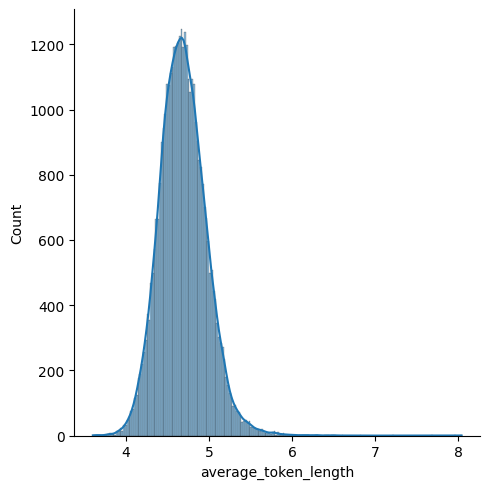

In [26]:
og_data = copy(onpdata)
sns.displot(og_data['average_token_length'], kde=True);

In [28]:
for col in onpdata.iloc[:,:-1].columns:
    temp = onpdata[onpdata[col] == 0]
    if temp.shape[0] == 0:
        onpdata[col] = np.log(onpdata[col])

feature scaling

In [31]:
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()


scaled_data = scaler.fit_transform(onpdata.iloc[:, :-2])
onpdata.iloc[:, :-2] = scaled_data

# Dim reduction

we try pca and t-SNE

first pca

In [34]:
from sklearn.manifold import TSNE
pca = PCA(n_components=2)
onpdata_reduced = pca.fit_transform(onpdata.iloc[:,:-2])
onpdata_reduced.shape

(38463, 2)

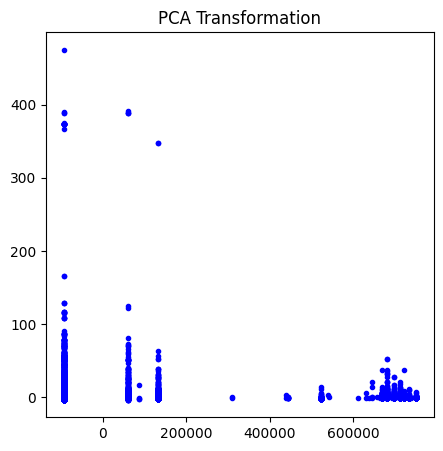

In [33]:
plt.figure(figsize=(5,5))
plt.plot(onpdata_reduced[:,0], onpdata_reduced[:,1], 'b.')
plt.title('PCA Transformation')

plt.show()

now t sne

In [39]:
tsne = TSNE(n_components=2, n_iter=300, random_state=42)
red_tsne = tsne.fit_transform(onpdata.iloc[:,:-2])

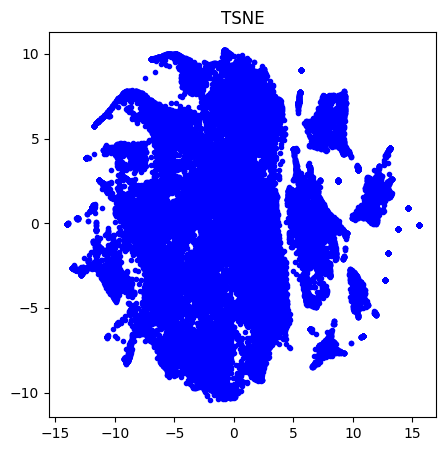

In [40]:
plt.figure(figsize=(5,5))
plt.plot(red_tsne[:,0], red_tsne[:,1], 'b.')
plt.title('TSNE')
plt.show()

# Clustering articles

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

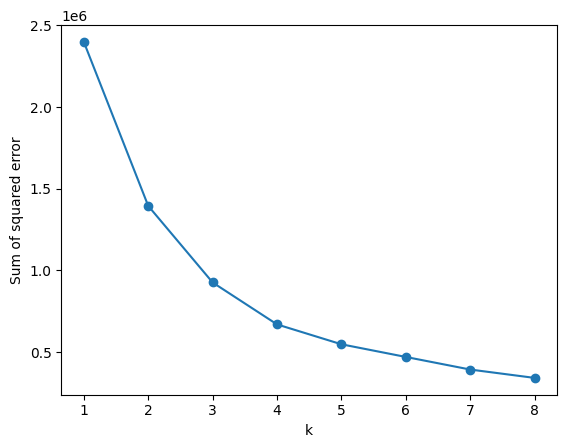

In [41]:
k=list(range(1,9))
ssd=[]
for i in k:
    kmeans=KMeans(n_clusters=i).fit(red_tsne)
    ssd.append(kmeans.inertia_)

plt.plot(k,ssd,'o-')
plt.xlabel('k')
plt.ylabel('Sum of squared error')
plt.show()

In [42]:
kmeans=KMeans(init='k-means++',n_clusters=4)
kmeans.fit(red_tsne)
kmeans_preds=kmeans.predict(red_tsne)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


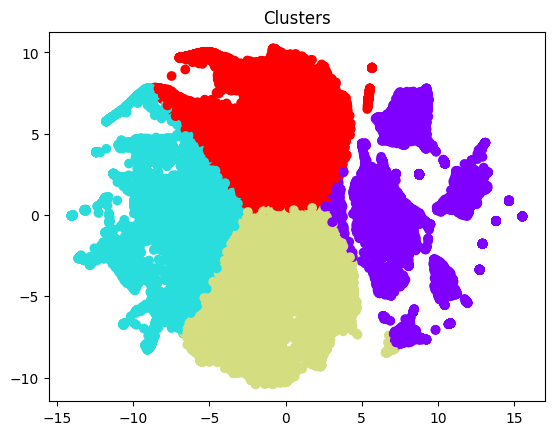

In [46]:
plt.scatter(red_tsne[:,0],red_tsne[:,1],c=kmeans_preds,cmap='rainbow')
plt.title('Clusters')
plt.show()

In [50]:
cluster_d=pd.concat([onpdata.reset_index(drop=True), pd.DataFrame(kmeans_preds, columns=['cluster'])],axis=1)

In [52]:
#creating new datasets from the clusters
cluster1 = cluster_d[cluster_d['cluster'] == 0]
cluster2 = cluster_d[cluster_d['cluster'] == 1]
cluster3 = cluster_d[cluster_d['cluster'] == 2]
cluster4 = cluster_d[cluster_d['cluster'] == 3]
print ('Cluster1 size: ',cluster1.shape)
print ('Cluster2 size: ',cluster2.shape)
print ('Cluster3 size: ',cluster3.shape)
print ('Cluster4 size: ',cluster4.shape)

Cluster1 size:  (9365, 58)
Cluster2 size:  (8596, 58)
Cluster3 size:  (10598, 58)
Cluster4 size:  (9904, 58)


In [55]:
from collections import Counter

#Cluster 1
X1 = cluster1.iloc[:, :-3]
y1 = cluster1.iloc[:, -2]
counter = Counter(y1)
print(counter)

#Cluster 2
X2 = cluster2.iloc[:, :-3]
y2 = cluster2.iloc[:, -2]
counter = Counter(y2)
print(counter)

#Cluster 3
X3 = cluster3.iloc[:, :-3]
y3 = cluster3.iloc[:, -2]
counter = Counter(y3)
print(counter)

#Cluster 4
X4 = cluster4.iloc[:, :-3]
y4 = cluster4.iloc[:, -2]
counter = Counter(y4)
print(counter)

Counter({'Unpopular': 7011, 'Popular': 2354})
Counter({'Unpopular': 5710, 'Popular': 2886})
Counter({'Unpopular': 8868, 'Popular': 1730})
Counter({'Unpopular': 7277, 'Popular': 2627})


# Balancing data set

In [56]:
!pip install imblearn==0.0

from imblearn.over_sampling import SMOTE
from matplotlib import pyplot
from numpy import where

In [57]:

oversample = SMOTE()


X1, y1 = oversample.fit_resample(X1, y1)
counter = Counter(y1)
print(counter)


X2, y2 = oversample.fit_resample(X2, y2)
counter = Counter(y2)
print(counter)


X3, y3 = oversample.fit_resample(X3, y3)
counter = Counter(y3)
print(counter)


X4, y4 = oversample.fit_resample(X4, y4)
counter = Counter(y4)
print(counter)


Counter({'Unpopular': 7011, 'Popular': 7011})
Counter({'Unpopular': 5710, 'Popular': 5710})
Counter({'Popular': 8868, 'Unpopular': 8868})
Counter({'Popular': 7277, 'Unpopular': 7277})


# Selecting features

extract best features

In [58]:

def extract_best_features(feature_scores, feature_col, n=5, sort_metric=False):

    temp = np.hstack((feature_scores.reshape(-1,1), feature_col.reshape(-1,1)))
    features = pd.DataFrame(temp, columns=['score', 'name'])
    features = features.sort_values(by=['score'], ascending=sort_metric).reset_index(drop=True)
    best_features = features.iloc[:n, :].to_numpy()
    return best_features

In [61]:
from sklearn.feature_selection import f_classif

In [80]:

# F-value for cluster 1
f1 = f_classif(X1, y1)

# F-value for cluster 2
f2 = f_classif(X2, y2)

# F-value for cluster 3
f3 = f_classif(X3, y3)

# F-value for cluster 4
f4 = f_classif(X4, y4)

/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [18] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


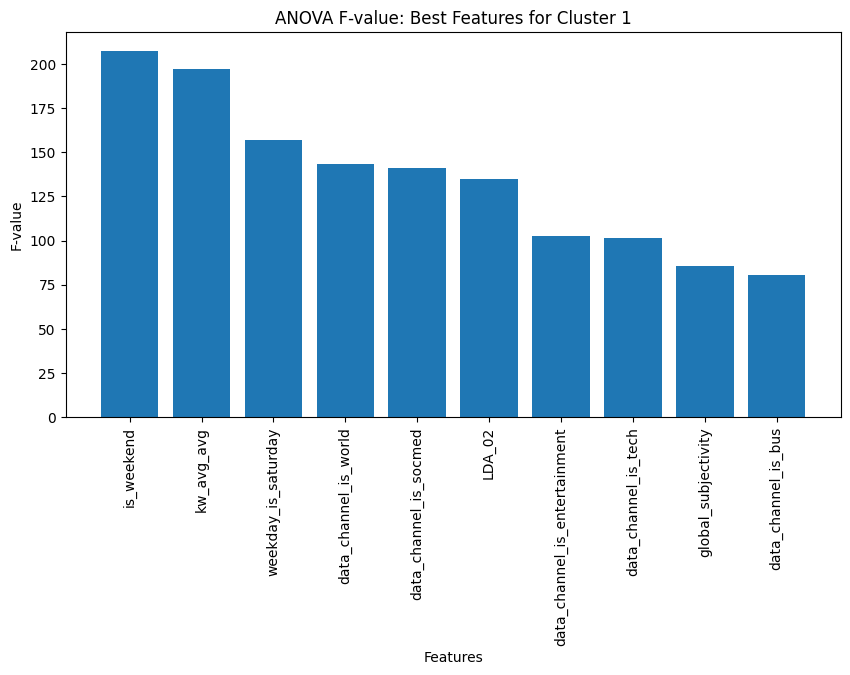

In [81]:
#Extract the 10 best features for cluster 1
fv1 = extract_best_features(f1[0], X1.columns.values, n=10)
fval_best_features1

# plot the best features for cluster 1
plt.figure(figsize=(10,5))
plt.bar(fv1[:,1], fv1[:,0])
plt.xticks(rotation=90)
plt.xlabel('Features')
plt.ylabel('F-value')
plt.title('ANOVA F-value: Best Features for Cluster 1')
plt.show()

In [82]:
#Extract the 10 best features for cluster 2
fv2 = extract_best_features(f2[0], X2.columns.values, n=10)

In [83]:
#Extract the 10 best features for cluster 3
fv3 = extract_best_features(f3[0], X3.columns.values, n=10)

In [100]:
#Extract the 10 best features for cluster 4
fv4 = extract_best_features(f4[0], X4.columns.values, n=10)


Mutual information

In [101]:
# Mutual Information future selection
# the input variable are the numerical features of each article
# the target ooutput variable is the categorical label popularity
from sklearn.feature_selection import mutual_info_classif

# Mutual information for cluster 1
m1 = mutual_info_classif(X1, y1)

# Mutual information for cluster 2
m2 = mutual_info_classif(X2, y2)

# Mutual information for cluster 3
m3 = mutual_info_classif(X3, y3)

# Mutual information for cluster 4
m4 = mutual_info_classif(X4, y4)

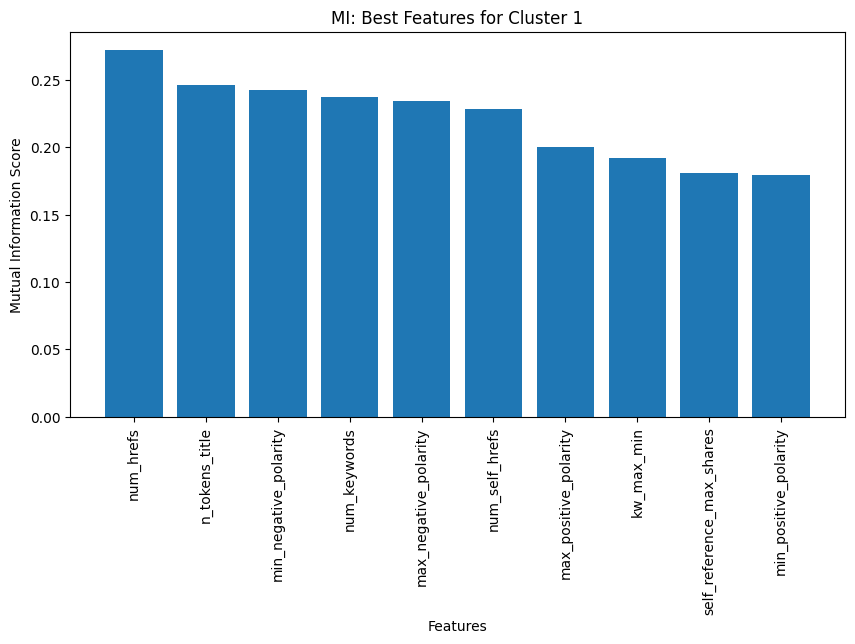

In [102]:
#Extract the 10 best features for cluster 1
mi1 = extract_best_features(m1, X1.columns.values, n=10)

# plot the best features for cluster 1
plt.figure(figsize=(10,5))
plt.bar(mi1[:,1], mi1[:,0])
plt.xticks(rotation=90)
plt.xlabel('Features')
plt.ylabel('Mutual Information Score')
plt.title('MI: Best Features for Cluster 1')
plt.show()

In [103]:
mi2 = extract_best_features(m2, X2.columns.values, n=10)

mi3 = extract_best_features(m3, X3.columns.values, n=10)

mi4 = extract_best_features(m4, X4.columns.values, n=10)

#Analysis of correlation with different features

In [104]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import f1_score
from sklearn.linear_model import LogisticRegression

In [114]:
def logistic_regression_news_model(name: str, target_labels, X, fv):

    labelEn = LabelEncoder()
    target_labels = labelEn.fit_transform(target_labels)

    unused_features = list(set(X.columns.values) - set(fv[:,1]))
    data_cluster_fval = X.drop(unused_features, axis=1, inplace=False)

    X_train_LR, X_test_LR, y_train_LR, y_test_LR = train_test_split(data_cluster_fval, target_labels, test_size=0.3, shuffle=False)

    lr = LogisticRegression().fit(X_train_LR, y_train_LR)
    y_pred_LR = lr.predict(X_test_LR)

    print(f"{name} - Linear regression Results for ANOVA F-value:")
    print(classification_report(y_test_LR, y_pred_LR))
    print("Confusion Matrix:")
    print(confusion_matrix(y_test_LR, y_pred_LR))
    print("\n")

    return Counter(y_pred_LR), accuracy_score(y_test_LR,y_pred_LR), precision_score(y_test_LR,y_pred_LR), recall_score(y_test_LR,y_pred_LR), f1_score(y_test_LR,y_pred_LR)



lr1 = logistic_regression_news_model("Cluster 1", y1.values, X1, fv1)
lr2 = logistic_regression_news_model("Cluster 2", y2.values, X2, fv2)
lr3 = logistic_regression_news_model("Cluster 3", y3.values, X3, fv3)
lr4 = logistic_regression_news_model("Cluster 4", y4.values, X4, fv4)

Cluster 1 - Linear regression Results for ANOVA F-value:
              precision    recall  f1-score   support

           0       1.00      0.04      0.08      4207
           1       0.00      0.00      0.00         0

    accuracy                           0.04      4207
   macro avg       0.50      0.02      0.04      4207
weighted avg       1.00      0.04      0.08      4207

Confusion Matrix:
[[ 174 4033]
 [   0    0]]


Cluster 2 - Linear regression Results for ANOVA F-value:
              precision    recall  f1-score   support

           0       0.88      0.04      0.08      2984
           1       0.13      0.96      0.23       442

    accuracy                           0.16      3426
   macro avg       0.50      0.50      0.15      3426
weighted avg       0.78      0.16      0.10      3426

Confusion Matrix:
[[ 126 2858]
 [  18  424]]




/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: Undefin

Cluster 3 - Linear regression Results for ANOVA F-value:
              precision    recall  f1-score   support

           0       1.00      0.11      0.20      5321
           1       0.00      0.00      0.00         0

    accuracy                           0.11      5321
   macro avg       0.50      0.06      0.10      5321
weighted avg       1.00      0.11      0.20      5321

Confusion Matrix:
[[ 592 4729]
 [   0    0]]




/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: Undefin

Cluster 4 - Linear regression Results for ANOVA F-value:
              precision    recall  f1-score   support

           0       1.00      0.09      0.17      4367
           1       0.00      0.00      0.00         0

    accuracy                           0.09      4367
   macro avg       0.50      0.05      0.08      4367
weighted avg       1.00      0.09      0.17      4367

Confusion Matrix:
[[ 394 3973]
 [   0    0]]




/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: Undefin

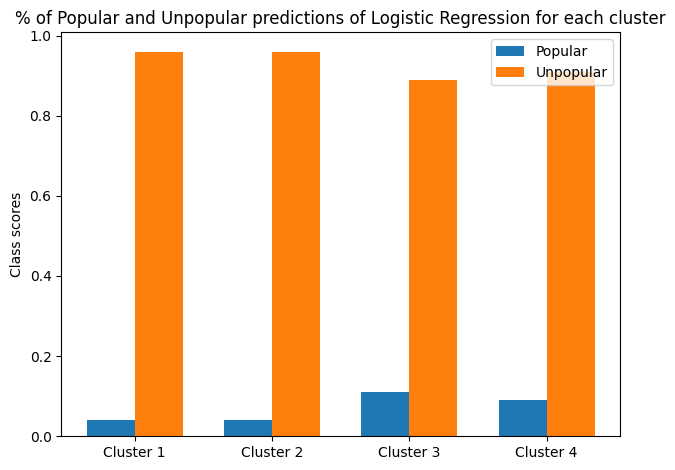

In [116]:
labels = ['Cluster 1', 'Cluster 2', 'Cluster 3', 'Cluster 4']

p1 = round(lr1[0][0] / (lr1[0][0] + lr1[0][1]), 2)
p2 = round(lr2[0][0] / (lr2[0][0] + lr2[0][1]), 2)
p3 = round(lr3[0][0] / (lr3[0][0] + lr3[0][1]), 2)
p4 = round(lr4[0][0] / (lr4[0][0] + lr4[0][1]), 2)

men_means = [p1, p2, p3, p4]
women_means = [1-p1, 1-p2, 1-p3, 1-p4]

x = np.arange(len(labels))
width = 0.35

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, men_means, width, label='Popular')
rects2 = ax.bar(x + width/2, women_means, width, label='Unpopular')


ax.set_ylabel('Class scores')
ax.set_title('% of Popular and Unpopular predictions of Logistic Regression for each cluster')
ax.set_xticks(x, labels)
ax.legend()


fig.tight_layout()

plt.show()

Mutual Information

In [117]:
def logistic_regression_news_model(name: str, target_labels, X, mi):

    labelEn = LabelEncoder()
    target_labels = labelEn.fit_transform(target_labels)

    unused_features = list(set(X.columns.values) - set(mi[:,1]))
    data_cluster_fval = X.drop(unused_features, axis=1, inplace=False)

    X_train, X_test, y_train, y_test = train_test_split(data_cluster_fval, target_labels, test_size=0.3, shuffle=False)

    lr = LogisticRegression().fit(X_train, y_train)
    y_pred = lr.predict(X_test)

    print(f"{name} - Linear regression Results for ANOVA F-value:")
    print(classification_report(y_test, y_pred))
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    print("\n")

    return Counter(y_pred)



lr1 = logistic_regression_news_model("Cluster 1", y1.values, X1, mi1)
lr2 = logistic_regression_news_model("Cluster 2", y2.values, X2, mi2)
lr3 = logistic_regression_news_model("Cluster 3", y3.values, X3, mi3)
lr4 = logistic_regression_news_model("Cluster 4", y4.values, X4, mi4)


Cluster 1 - Linear regression Results for ANOVA F-value:
              precision    recall  f1-score   support

           0       1.00      0.00      0.01      4207
           1       0.00      0.00      0.00         0

    accuracy                           0.00      4207
   macro avg       0.50      0.00      0.00      4207
weighted avg       1.00      0.00      0.01      4207

Confusion Matrix:
[[  21 4186]
 [   0    0]]


Cluster 2 - Linear regression Results for ANOVA F-value:

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



              precision    recall  f1-score   support

           0       0.86      0.03      0.06      2984
           1       0.13      0.96      0.23       442

    accuracy                           0.15      3426
   macro avg       0.49      0.50      0.14      3426
weighted avg       0.76      0.15      0.08      3426

Confusion Matrix:
[[  95 2889]
 [  16  426]]


Cluster 3 - Linear regression Results for ANOVA F-value:
              precision    recall  f1-score   support

           0       1.00      0.03      0.06      5321
           1       0.00      0.00      0.00         0

    accuracy                           0.03      5321
   macro avg       0.50      0.02      0.03      5321
weighted avg       1.00      0.03      0.06      5321

Confusion Matrix:
[[ 165 5156]
 [   0    0]]


Cluster 4 - Linear regression Results for ANOVA F-value:
              precision    recall  f1-score   support

           0       1.00      0.04      0.07      4367
           1       0.00     

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: Undefin

In [96]:
from sklearn.neighbors import KNeighborsClassifier

In [118]:
def knn_news_model(name: str, target_labels, X, fv):

    labelEn = LabelEncoder()
    target_labels = labelEn.fit_transform(target_labels)

    unused_features = list(set(X.columns.values) - set(fv[:,1]))
    data_cluster_fval = X.drop(unused_features, axis=1, inplace=False)

    X_train_KN, X_test_KN, y_train_KN, y_test_KN = train_test_split(data_cluster_fval, target_labels, test_size=0.3, shuffle=False)

    knn = KNeighborsClassifier(n_neighbors=50).fit(X_train_KN, y_train_KN)
    y_pred_KN = knn.predict(X_test_KN)

    print(f"{name} - KNN (k=50) for ANOVA F-value:")
    print(classification_report(y_test_KN, y_pred_KN))
    print("Confusion Matrix:")
    print(confusion_matrix(y_test_KN, y_pred_KN))
    print("\n")

    return Counter(y_pred_KN), accuracy_score(y_test_KN,y_pred_KN), precision_score(y_test_KN,y_pred_KN), recall_score(y_test_KN,y_pred_KN), f1_score(y_test_KN,y_pred_KN)

knn1 = knn_news_model("Cluster 1", y1.values, X1, fv1)
knn2 = knn_news_model("Cluster 2", y2.values, X2, fv2)
knn3 = knn_news_model("Cluster 3", y3.values, X3, fv3)
knn4 = knn_news_model("Cluster 3", y4.values, X4, fv4)

Cluster 1 - KNN (k=50) for ANOVA F-value:
              precision    recall  f1-score   support

           0       1.00      0.13      0.22      4207
           1       0.00      0.00      0.00         0

    accuracy                           0.13      4207
   macro avg       0.50      0.06      0.11      4207
weighted avg       1.00      0.13      0.22      4207

Confusion Matrix:
[[ 533 3674]
 [   0    0]]




/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: Undefin

Cluster 2 - KNN (k=50) for ANOVA F-value:
              precision    recall  f1-score   support

           0       0.93      0.21      0.35      2984
           1       0.14      0.90      0.25       442

    accuracy                           0.30      3426
   macro avg       0.54      0.56      0.30      3426
weighted avg       0.83      0.30      0.33      3426

Confusion Matrix:
[[ 636 2348]
 [  45  397]]


Cluster 3 - KNN (k=50) for ANOVA F-value:
              precision    recall  f1-score   support

           0       1.00      0.29      0.45      5321
           1       0.00      0.00      0.00         0

    accuracy                           0.29      5321
   macro avg       0.50      0.14      0.22      5321
weighted avg       1.00      0.29      0.45      5321

Confusion Matrix:
[[1527 3794]
 [   0    0]]




/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: Undefin

Cluster 3 - KNN (k=50) for ANOVA F-value:
              precision    recall  f1-score   support

           0       1.00      0.11      0.20      4367
           1       0.00      0.00      0.00         0

    accuracy                           0.11      4367
   macro avg       0.50      0.06      0.10      4367
weighted avg       1.00      0.11      0.20      4367

Confusion Matrix:
[[ 496 3871]
 [   0    0]]




/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: Undefin

## dt and rf

In [109]:
from sklearn.tree import DecisionTreeClassifier

In [119]:
def decision_tree_news_model(name: str, target_labels, X, fv):

    labelEn = LabelEncoder()
    target_labels = labelEn.fit_transform(target_labels)

    unused_features = list(set(X.columns.values) - set(fv[:,1]))
    data_cluster_fval = X.drop(unused_features, axis=1, inplace=False)

    X_train_DT, X_test_DT, y_train_DT, y_test_DT = train_test_split(data_cluster_fval, target_labels, test_size=0.3, shuffle=False)

    dt = DecisionTreeClassifier().fit(X_train_DT, y_train_DT)
    y_pred_DT = dt.predict(X_test_DT)

    print(f"{name} - Decision Tree Results for MI:")
    print(classification_report(y_test_DT, y_pred_DT))
    print("Confusion Matrix:")
    print(confusion_matrix(y_test_DT, y_pred_DT))
    print("\n")
    return Counter(y_pred_DT), accuracy_score(y_test_DT,y_pred_DT), precision_score(y_test_DT,y_pred_DT), recall_score(y_test_DT,y_pred_DT), f1_score(y_test_DT,y_pred_DT)

dt1 = decision_tree_news_model("Cluster 1", y1.values, X1, fv1)
dt2 = decision_tree_news_model("Cluster 2", y2.values, X2, fv2)
dt3 = decision_tree_news_model("Cluster 3", y3.values, X3, fv3)
dt4 = decision_tree_news_model("Cluster 4", y4.values, X4, fv4)


Cluster 1 - Decision Tree Results for MI:
              precision    recall  f1-score   support

           0       1.00      0.71      0.83      4207
           1       0.00      0.00      0.00         0

    accuracy                           0.71      4207
   macro avg       0.50      0.36      0.42      4207
weighted avg       1.00      0.71      0.83      4207

Confusion Matrix:
[[3005 1202]
 [   0    0]]


Cluster 2 - Decision Tree Results for MI:
              precision    recall  f1-score   support

           0       0.92      0.49      0.64      2984
           1       0.17      0.71      0.28       442

    accuracy                           0.52      3426
   macro avg       0.55      0.60      0.46      3426
weighted avg       0.82      0.52      0.59      3426

Confusion Matrix:
[[1452 1532]
 [ 127  315]]




/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: Undefin

Cluster 3 - Decision Tree Results for MI:
              precision    recall  f1-score   support

           0       1.00      0.66      0.79      5321
           1       0.00      0.00      0.00         0

    accuracy                           0.66      5321
   macro avg       0.50      0.33      0.40      5321
weighted avg       1.00      0.66      0.79      5321

Confusion Matrix:
[[3491 1830]
 [   0    0]]


Cluster 4 - Decision Tree Results for MI:
              precision    recall  f1-score   support

           0       1.00      0.60      0.75      4367
           1       0.00      0.00      0.00         0

    accuracy                           0.60      4367
   macro avg       0.50      0.30      0.37      4367
weighted avg       1.00      0.60      0.75      4367

Confusion Matrix:
[[2619 1748]
 [   0    0]]




/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: Undefin

In [112]:
print(dt1, dt2)

(Counter({0: 2998, 1: 1209}), 0.712621820774899, 0.0, 0.0, 0.0) (Counter({1: 1836, 0: 1590}), 0.5166374781085814, 0.16938997821350762, 0.7036199095022625, 0.2730465320456541)


In [120]:
def decision_tree_news_model(name: str, target_labels, X, mi):

    labelEn = LabelEncoder()
    target_labels = labelEn.fit_transform(target_labels)

    unused_features = list(set(X.columns.values) - set(mi[:,1]))
    data_cluster_fval = X.drop(unused_features, axis=1, inplace=False)

    X_train_DT, X_test_DT, y_train_DT, y_test_DT = train_test_split(data_cluster_fval, target_labels, test_size=0.3, shuffle=False)

    dt = DecisionTreeClassifier().fit(X_train_DT, y_train_DT)
    y_pred_DT = dt.predict(X_test_DT)

    print(f"{name} - Decision Tree Results for MI:")
    print(classification_report(y_test_DT, y_pred_DT))
    print("Confusion Matrix:")
    print(confusion_matrix(y_test_DT, y_pred_DT))
    print("\n")

    return Counter(y_pred_DT)


dt1 = decision_tree_news_model("Cluster 1", y1.values, X1, mi1)
dt2 = decision_tree_news_model("Cluster 2", y2.values, X2, mi2)
dt3 = decision_tree_news_model("Cluster 3", y3.values, X3, mi3)
dt4 = decision_tree_news_model("Cluster 4", y4.values, X4, mi4)

Cluster 1 - Decision Tree Results for MI:
              precision    recall  f1-score   support

           0       1.00      0.72      0.84      4207
           1       0.00      0.00      0.00         0

    accuracy                           0.72      4207
   macro avg       0.50      0.36      0.42      4207
weighted avg       1.00      0.72      0.84      4207

Confusion Matrix:
[[3041 1166]
 [   0    0]]


Cluster 2 - Decision Tree Results for MI:
              precision    recall  f1-score   support

           0       0.93      0.59      0.72      2984
           1       0.20      0.71      0.31       442

    accuracy                           0.60      3426
   macro avg       0.57      0.65      0.52      3426
weighted avg       0.84      0.60      0.67      3426

Confusion Matrix:
[[1750 1234]
 [ 130  312]]




/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Cluster 3 - Decision Tree Results for MI:
              precision    recall  f1-score   support

           0       1.00      0.89      0.94      5321
           1       0.00      0.00      0.00         0

    accuracy                           0.89      5321
   macro avg       0.50      0.45      0.47      5321
weighted avg       1.00      0.89      0.94      5321

Confusion Matrix:
[[4741  580]
 [   0    0]]


Cluster 4 - Decision Tree Results for MI:
              precision    recall  f1-score   support

           0       1.00      0.64      0.78      4367
           1       0.00      0.00      0.00         0

    accuracy                           0.64      4367
   macro avg       0.50      0.32      0.39      4367
weighted avg       1.00      0.64      0.78      4367

Confusion Matrix:
[[2787 1580]
 [   0    0]]




/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: Undefin

In [121]:
from sklearn.ensemble import RandomForestClassifier

In [122]:
def random_forrest_news_model(name: str, target_labels, X, fv):

    labelEn = LabelEncoder()
    target_labels = labelEn.fit_transform(target_labels)

    unused_features = list(set(X.columns.values) - set(fv[:,1]))
    data_cluster_fval = X.drop(unused_features, axis=1, inplace=False)

    X_train_RF, X_test_RF, y_train_RF, y_test_RF = train_test_split(data_cluster_fval, target_labels, test_size=0.3, shuffle=False)

    rf = RandomForestClassifier().fit(X_train_RF, y_train_RF)
    y_pred_RF = rf.predict(X_test_RF)

    print(f"{name} - Random Forrest for ANOVA F-values:")
    print(classification_report(y_test_RF, y_pred_RF))
    print("Confusion Matrix:")
    print(confusion_matrix(y_test_RF, y_pred_RF))
    print("\n")

    return Counter(y_pred_RF), accuracy_score(y_test_RF,y_pred_RF), precision_score(y_test_RF,y_pred_RF), recall_score(y_test_RF,y_pred_RF), f1_score(y_test_RF,y_pred_RF)


rf1 = random_forrest_news_model("Cluster 1", y1.values, X1, fv1)
rf2 = random_forrest_news_model("Cluster 2", y2.values, X2, fv2)
rf3 = random_forrest_news_model("Cluster 3", y3.values, X3, fv3)
rf4 = random_forrest_news_model("Cluster 4", y4.values, X4, fv4)

Cluster 1 - Random Forrest for ANOVA F-values:
              precision    recall  f1-score   support

           0       1.00      0.73      0.84      4207
           1       0.00      0.00      0.00         0

    accuracy                           0.73      4207
   macro avg       0.50      0.36      0.42      4207
weighted avg       1.00      0.73      0.84      4207

Confusion Matrix:
[[3058 1149]
 [   0    0]]




/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: Undefin

Cluster 2 - Random Forrest for ANOVA F-values:
              precision    recall  f1-score   support

           0       0.95      0.44      0.60      2984
           1       0.19      0.86      0.30       442

    accuracy                           0.49      3426
   macro avg       0.57      0.65      0.45      3426
weighted avg       0.86      0.49      0.56      3426

Confusion Matrix:
[[1315 1669]
 [  63  379]]


Cluster 3 - Random Forrest for ANOVA F-values:
              precision    recall  f1-score   support

           0       1.00      0.64      0.78      5321
           1       0.00      0.00      0.00         0

    accuracy                           0.64      5321
   macro avg       0.50      0.32      0.39      5321
weighted avg       1.00      0.64      0.78      5321

Confusion Matrix:
[[3406 1915]
 [   0    0]]




/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: Undefin

Cluster 4 - Random Forrest for ANOVA F-values:
              precision    recall  f1-score   support

           0       1.00      0.54      0.70      4367
           1       0.00      0.00      0.00         0

    accuracy                           0.54      4367
   macro avg       0.50      0.27      0.35      4367
weighted avg       1.00      0.54      0.70      4367

Confusion Matrix:
[[2338 2029]
 [   0    0]]




/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: Undefin

In [123]:
def random_forrest_news_model(name: str, target_labels, X, mi):

    labelEn = LabelEncoder()
    target_labels = labelEn.fit_transform(target_labels)

    unused_features = list(set(X.columns.values) - set(mi[:,1]))
    data_cluster_fval = X.drop(unused_features, axis=1, inplace=False)

    X_train, X_test, y_train, y_test = train_test_split(data_cluster_fval, target_labels, test_size=0.3, shuffle=False)

    rf = RandomForestClassifier().fit(X_train, y_train)
    y_pred = rf.predict(X_test)

    print(f"{name} - Random Forrest Results for MI:")
    print(classification_report(y_test, y_pred))
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    print("\n")
    print(f1_score(y_test,y_pred))

    return Counter(y_pred)


rf1 = random_forrest_news_model("Cluster 1", y1.values, X1, mi1)
rf2 = random_forrest_news_model("Cluster 2", y2.values, X2, mi2)
rf3 = random_forrest_news_model("Cluster 3", y3.values, X3, mi3)
rf4 = random_forrest_news_model("Cluster 4", y4.values, X4, mi4)

Cluster 1 - Random Forrest Results for MI:
              precision    recall  f1-score   support

           0       1.00      0.81      0.90      4207
           1       0.00      0.00      0.00         0

    accuracy                           0.81      4207
   macro avg       0.50      0.41      0.45      4207
weighted avg       1.00      0.81      0.90      4207

Confusion Matrix:
[[3426  781]
 [   0    0]]


0.0


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Cluster 2 - Random Forrest Results for MI:
              precision    recall  f1-score   support

           0       0.97      0.55      0.71      2984
           1       0.23      0.90      0.37       442

    accuracy                           0.60      3426
   macro avg       0.60      0.73      0.54      3426
weighted avg       0.88      0.60      0.66      3426

Confusion Matrix:
[[1656 1328]
 [  45  397]]


0.3664051684356253
Cluster 3 - Random Forrest Results for MI:
              precision    recall  f1-score   support

           0       1.00      0.94      0.97      5321
           1       0.00      0.00      0.00         0

    accuracy                           0.94      5321
   macro avg       0.50      0.47      0.48      5321
weighted avg       1.00      0.94      0.97      5321

Confusion Matrix:
[[4990  331]
 [   0    0]]


0.0


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Cluster 4 - Random Forrest Results for MI:
              precision    recall  f1-score   support

           0       1.00      0.65      0.79      4367
           1       0.00      0.00      0.00         0

    accuracy                           0.65      4367
   macro avg       0.50      0.33      0.39      4367
weighted avg       1.00      0.65      0.79      4367

Confusion Matrix:
[[2847 1520]
 [   0    0]]


0.0


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## SVM

In [124]:
from sklearn.svm import SVC

In [125]:
def svm_news_model(name: str, target_labels, X, fv):

    labelEn = LabelEncoder()
    target_labels = labelEn.fit_transform(target_labels)

    unused_features = list(set(X.columns.values) - set(fv[:,1]))
    data_cluster_fval = X.drop(unused_features, axis=1, inplace=False)

    X_train_SV, X_test_SV, y_train_SV, y_test_SV = train_test_split(data_cluster_fval, target_labels, test_size=0.3, shuffle=False)

    svm = SVC().fit(X_train_SV, y_train_SV)
    y_pred_SV = svm.predict(X_test_SV)

    print(f"{name} - SVM for ANOVA F-values:")
    print(classification_report(y_test_SV, y_pred_SV))
    print("Confusion Matrix:")
    print(confusion_matrix(y_test_SV, y_pred_SV))
    print("\n")

    return Counter(y_pred_SV), accuracy_score(y_test_SV,y_pred_SV), precision_score(y_test_SV,y_pred_SV), recall_score(y_test_SV,y_pred_SV), f1_score(y_test_SV,y_pred_SV)


svm1 = svm_news_model("Cluster 1", y1.values, X1, fv1)
svm2 = svm_news_model("Cluster 2", y2.values, X2, fv2)
svm3 = svm_news_model("Cluster 3", y3.values, X3, fv3)
svm4 = svm_news_model("Cluster 4", y4.values, X4, fv4)


Cluster 1 - SVM for ANOVA F-values:
              precision    recall  f1-score   support

           0       1.00      0.11      0.19      4207
           1       0.00      0.00      0.00         0

    accuracy                           0.11      4207
   macro avg       0.50      0.05      0.10      4207
weighted avg       1.00      0.11      0.19      4207

Confusion Matrix:
[[ 450 3757]
 [   0    0]]




/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: Undefin

Cluster 2 - SVM for ANOVA F-values:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      2984
           1       0.13      1.00      0.23       442

    accuracy                           0.13      3426
   macro avg       0.06      0.50      0.11      3426
weighted avg       0.02      0.13      0.03      3426

Confusion Matrix:
[[   0 2984]
 [   0  442]]




/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Cluster 3 - SVM for ANOVA F-values:
              precision    recall  f1-score   support

           0       1.00      0.17      0.29      5321
           1       0.00      0.00      0.00         0

    accuracy                           0.17      5321
   macro avg       0.50      0.08      0.14      5321
weighted avg       1.00      0.17      0.29      5321

Confusion Matrix:
[[ 891 4430]
 [   0    0]]




/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: Undefin

Cluster 4 - SVM for ANOVA F-values:
              precision    recall  f1-score   support

           0       1.00      0.04      0.08      4367
           1       0.00      0.00      0.00         0

    accuracy                           0.04      4367
   macro avg       0.50      0.02      0.04      4367
weighted avg       1.00      0.04      0.08      4367

Confusion Matrix:
[[ 181 4186]
 [   0    0]]




/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: Undefin

In [126]:
def svm_news_model(name: str, target_labels, X, mi):

    labelEn = LabelEncoder()
    target_labels = labelEn.fit_transform(target_labels)

    unused_features = list(set(X.columns.values) - set(mi[:,1]))
    data_cluster_fval = X.drop(unused_features, axis=1, inplace=False)

    X_train, X_test, y_train, y_test = train_test_split(data_cluster_fval, target_labels, test_size=0.3, shuffle=False)

    svm = SVC().fit(X_train, y_train)
    y_pred = svm.predict(X_test)

    print(f"{name} - SVM for MI:")
    print(classification_report(y_test, y_pred))
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    print("\n")

    return Counter(y_pred)


svm1 = svm_news_model("Cluster 1", y1.values, X1, mi1)
svm2 = svm_news_model("Cluster 2", y2.values, X2, mi2)
svm3 = svm_news_model("Cluster 3", y3.values, X3, mi3)
svm4 = svm_news_model("Cluster 4", y4.values, X4, mi4)

Cluster 1 - SVM for MI:
              precision    recall  f1-score   support

           0       1.00      0.01      0.02      4207
           1       0.00      0.00      0.00         0

    accuracy                           0.01      4207
   macro avg       0.50      0.00      0.01      4207
weighted avg       1.00      0.01      0.02      4207

Confusion Matrix:
[[  32 4175]
 [   0    0]]




/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Cluster 2 - SVM for MI:
              precision    recall  f1-score   support

           0       0.96      0.04      0.08      2984
           1       0.13      0.99      0.23       442

    accuracy                           0.16      3426
   macro avg       0.55      0.51      0.16      3426
weighted avg       0.85      0.16      0.10      3426

Confusion Matrix:
[[ 123 2861]
 [   5  437]]


Cluster 3 - SVM for MI:
              precision    recall  f1-score   support

           0       1.00      0.04      0.07      5321
           1       0.00      0.00      0.00         0

    accuracy                           0.04      5321
   macro avg       0.50      0.02      0.04      5321
weighted avg       1.00      0.04      0.07      5321

Confusion Matrix:
[[ 197 5124]
 [   0    0]]




/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Cluster 4 - SVM for MI:
              precision    recall  f1-score   support

           0       1.00      0.02      0.04      4367
           1       0.00      0.00      0.00         0

    accuracy                           0.02      4367
   macro avg       0.50      0.01      0.02      4367
weighted avg       1.00      0.02      0.04      4367

Confusion Matrix:
[[ 100 4267]
 [   0    0]]




/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
